In [5]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\hp0036au\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Filter for US Data Analyst roles

In [6]:
df_DA_Canada = df[(df['job_country'] == 'Canada') & (df['job_title_short'] == 'Data Analyst')]

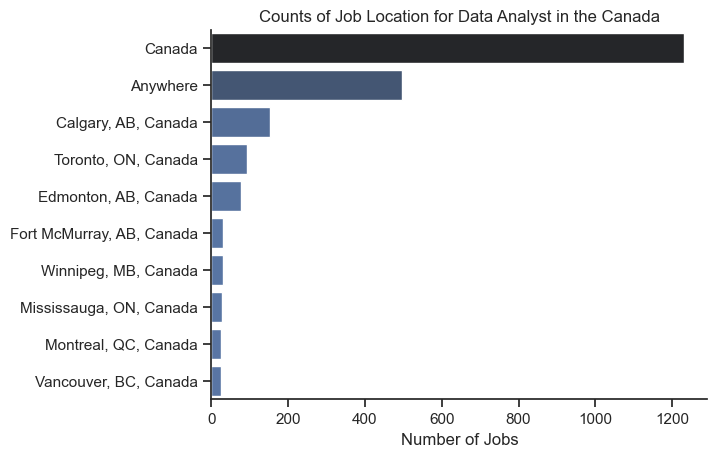

In [20]:
df_plot= df_DA_Canada['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x = 'count' , y='job_location',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Job Location for Data Analyst in the Canada')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

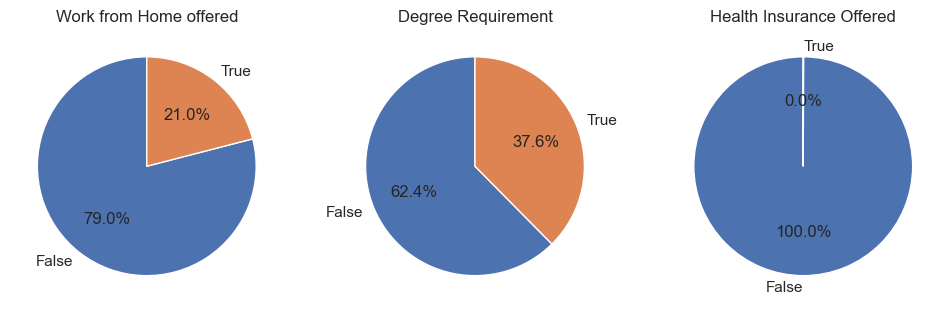

In [21]:
dict_column ={
    'job_work_from_home' : 'Work from Home offered',
    'job_no_degree_mention' : 'Degree Requirement',
    'job_health_insurance' : 'Health Insurance Offered'
}

fig,ax = plt.subplots(1,3)
fig.set_size_inches(12,5)

for i,(column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_Canada[column].value_counts(),labels=['False','True'],autopct='%1.1f%%',startangle=90)
    ax[i].set_title(title)

plt.show()

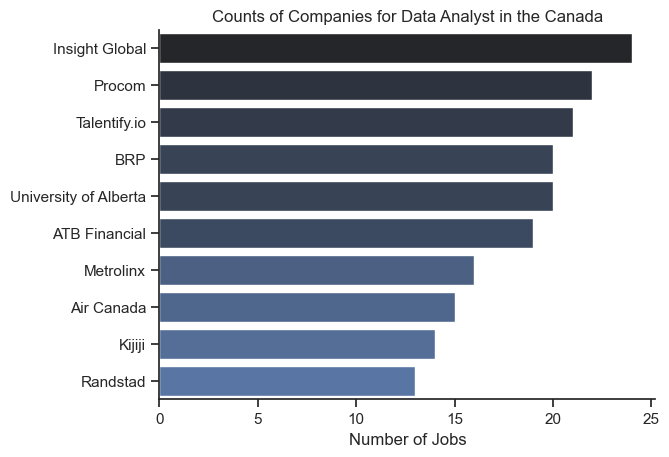

In [23]:
df_plot= df_DA_Canada['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot,x = 'count' , y='company_name',hue='count',palette='dark:b_r',legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the Canada')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()